In [1]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
import hw2p1

C:\Users\Alix Gates\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# get data
cred_df = pd.read_csv('data/credit_data.csv')
ignore_with_predictor = ['zipcode', 'PersonID', 'SeriousDlqin2yrs']
ignore_without_predictor = ['zipcode', 'PersonID']
df_sans_ignore_with_predictor = cred_df.drop(ignore_with_predictor, axis=1)
df_sans_ignore_without_predictor = cred_df.drop(ignore_without_predictor, axis=1)

In [3]:
# run correlations on each of the columns to see what's going on in the data
# with the final predictor
hw2p1.get_correlations(df_sans_ignore_with_predictor)

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
RevolvingUtilizationOfUnsecuredLines,1.000000,-0.008003,-0.001999,0.022250,0.005832,-0.014590,-0.001686,0.004763,-0.001413,0.005342
age,-0.008003,1.000000,-0.068696,0.038828,0.048138,0.159866,-0.069036,0.049168,-0.063622,-0.211002
NumberOfTime30-59DaysPastDueNotWorse,-0.001999,-0.068696,1.000000,-0.011620,-0.015224,-0.070704,0.984465,-0.037863,0.988530,-0.007840
DebtRatio,0.022250,0.038828,-0.011620,1.000000,-0.022988,0.082791,-0.014790,0.177858,-0.013290,-0.070558
MonthlyIncome,0.005832,0.048138,-0.015224,-0.022988,1.000000,0.107100,-0.017954,0.127313,-0.015336,0.060528
NumberOfOpenCreditLinesAndLoans,-0.014590,0.159866,-0.070704,0.082791,0.107100,1.000000,-0.098176,0.442776,-0.087154,0.060218
NumberOfTimes90DaysLate,-0.001686,-0.069036,0.984465,-0.014790,-0.017954,-0.098176,1.000000,-0.054661,0.992143,-0.015737
NumberRealEstateLoansOrLines,0.004763,0.049168,-0.037863,0.177858,0.127313,0.442776,-0.054661,1.000000,-0.047996,0.114880
NumberOfTime60-89DaysPastDueNotWorse,-0.001413,-0.063622,0.988530,-0.013290,-0.015336,-0.087154,0.992143,-0.047996,1.000000,-0.016493
NumberOfDependents,0.005342,-0.211002,-0.007840,-0.070558,0.060528,0.060218,-0.015737,0.114880,-0.016493,1.000000


In [4]:
# run correlations on each of the columns to see what's going on in the data without the final
# predictor
hw2p1.get_correlations(df_sans_ignore_without_predictor)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
SeriousDlqin2yrs,1.000000,-0.004586,-0.173728,0.149334,-0.013502,-0.032810,-0.039898,0.139609,-0.010641,0.121886,0.065708
RevolvingUtilizationOfUnsecuredLines,-0.004586,1.000000,-0.008003,-0.001999,0.022250,0.005832,-0.014590,-0.001686,0.004763,-0.001413,0.005342
age,-0.173728,-0.008003,1.000000,-0.068696,0.038828,0.048138,0.159866,-0.069036,0.049168,-0.063622,-0.211002
NumberOfTime30-59DaysPastDueNotWorse,0.149334,-0.001999,-0.068696,1.000000,-0.011620,-0.015224,-0.070704,0.984465,-0.037863,0.988530,-0.007840
DebtRatio,-0.013502,0.022250,0.038828,-0.011620,1.000000,-0.022988,0.082791,-0.014790,0.177858,-0.013290,-0.070558
MonthlyIncome,-0.032810,0.005832,0.048138,-0.015224,-0.022988,1.000000,0.107100,-0.017954,0.127313,-0.015336,0.060528
NumberOfOpenCreditLinesAndLoans,-0.039898,-0.014590,0.159866,-0.070704,0.082791,0.107100,1.000000,-0.098176,0.442776,-0.087154,0.060218
NumberOfTimes90DaysLate,0.139609,-0.001686,-0.069036,0.984465,-0.014790,-0.017954,-0.098176,1.000000,-0.054661,0.992143,-0.015737
NumberRealEstateLoansOrLines,-0.010641,0.004763,0.049168,-0.037863,0.177858,0.127313,0.442776,-0.054661,1.000000,-0.047996,0.114880
NumberOfTime60-89DaysPastDueNotWorse,0.121886,-0.001413,-0.063622,0.988530,-0.013290,-0.015336,-0.087154,0.992143,-0.047996,1.000000,-0.016493


In [5]:
# commented this out because it takes too much time to run, but it helped me see correlations better
# hw2p1.make_scatter(cred_df)

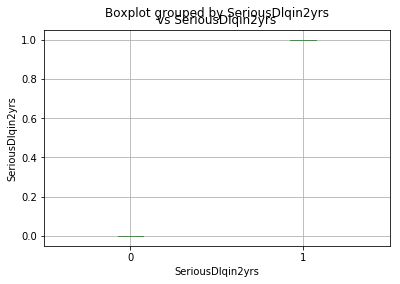

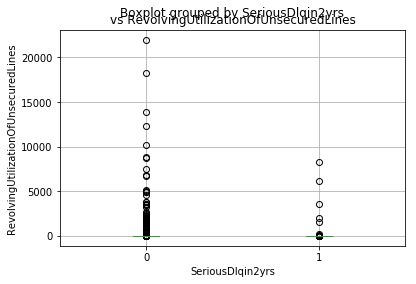

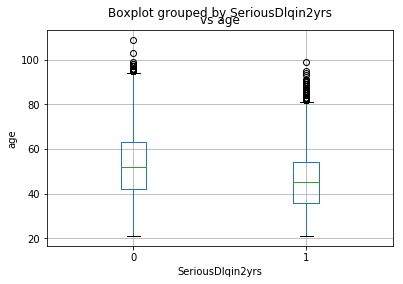

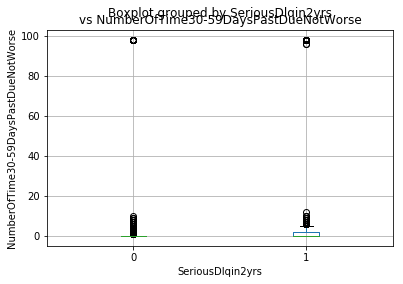

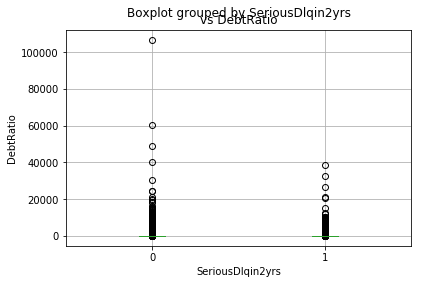

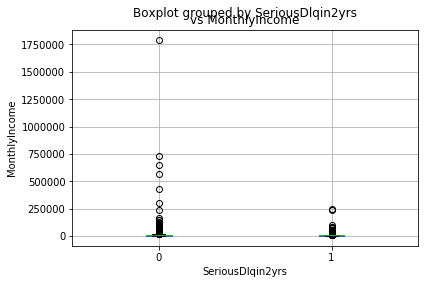

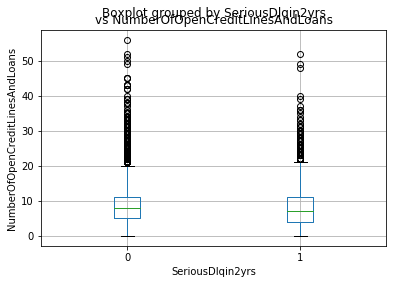

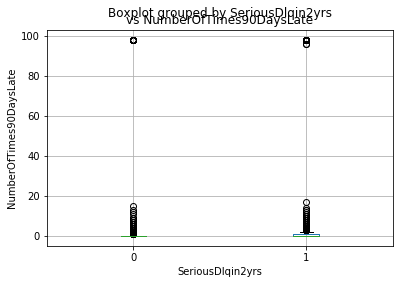

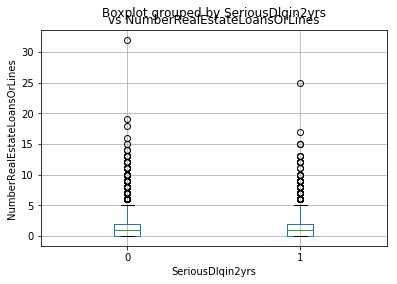

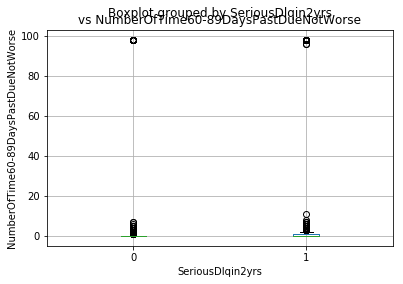

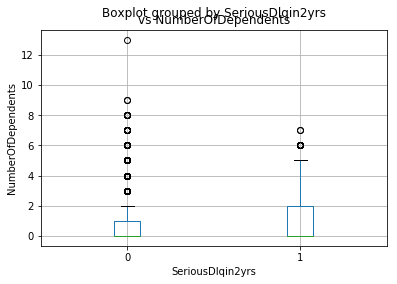

In [6]:
# make boxplots without predictor
hw2p1.make_boxplots(df_sans_ignore_without_predictor, 'SeriousDlqin2yrs')

In [7]:
# dealing with outliers: calculate z-scores for each data point,
# then determine how many datapoints in each row are outliers.
# outlier for this project is defined as having a zscore greater than 1.96.
zscore_df = hw2p1.make_zscore_df(df_sans_ignore_with_predictor)
zscore_df.head()

,num_outliers,RevolvingUtilizationOfUnsecuredLines_zscore,age_zscore,NumberOfTime30-59DaysPastDueNotWorse_zscore,DebtRatio_zscore,MonthlyIncome_zscore,NumberOfOpenCreditLinesAndLoans_zscore,NumberOfTimes90DaysLate_zscore,NumberRealEstateLoansOrLines_zscore,NumberOfTime60-89DaysPastDueNotWorse_zscore,NumberOfDependents_zscore
0,NaN,-0.024257,0.224896,-0.113192,0.133894,-0.489260,-1.229706,-0.08084,-0.874310,-0.071879,-0.689603
1,NaN,-0.026298,1.309871,-0.113192,-0.255379,0.675773,-0.269520,-0.08084,0.859054,-0.071879,-0.689603
2,NaN,-0.028570,-0.046348,-0.113192,-0.255722,-0.176919,-0.653594,-0.08084,-0.874310,-0.071879,-0.689603
3,NaN,-0.024644,0.224896,0.655208,-0.255120,0.183910,0.690666,-0.08084,1.725736,-0.071879,-0.689603
4,NaN,-0.028649,-0.453214,-0.113192,-0.255695,0.284603,-0.845631,-0.08084,-0.874310,-0.071879,1.094090


In [8]:
# tell me which rows have many outliers or any outliers in them
score = 1.96 # set the zscore or outliers to 1.96. while the normal zscore for outliers is 3, there are no data with a zscore of 3, but there are outliers int he data (the boxplots show that), so wanted to capture those.
rows_with_many_outliers, rows_with_any_outliers = hw2p1.calculate_outliers_per_row(zscore_df, score)

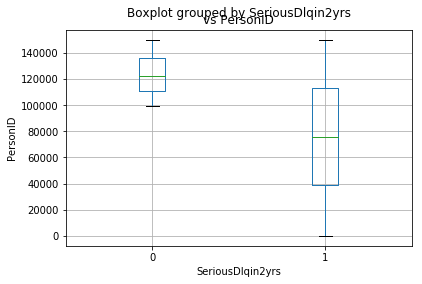

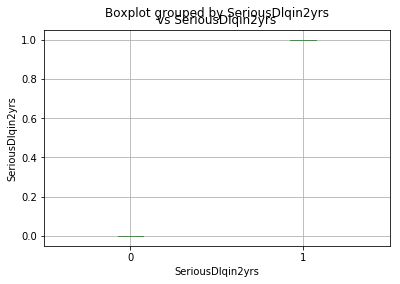

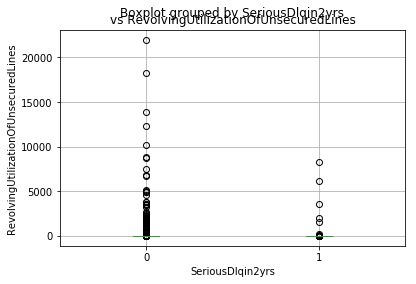

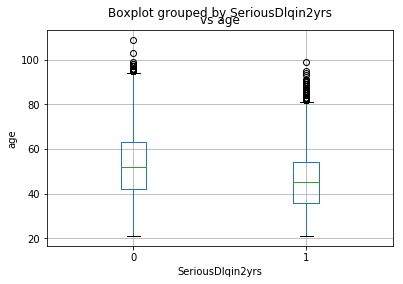

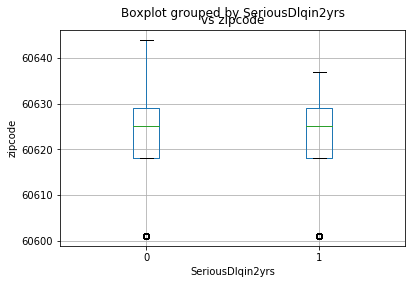

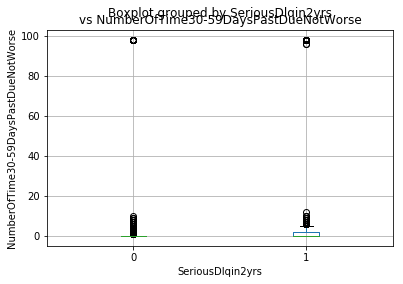

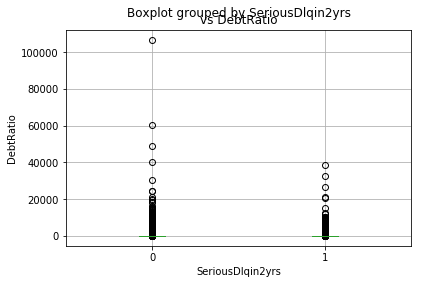

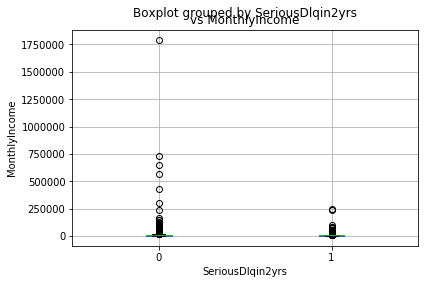

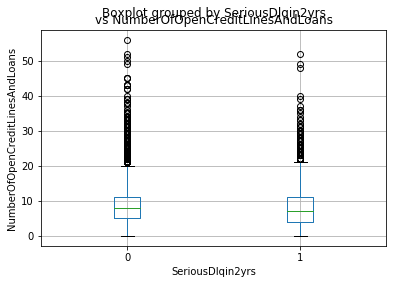

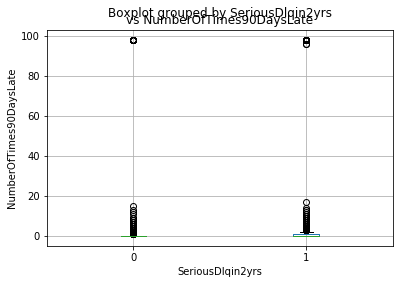

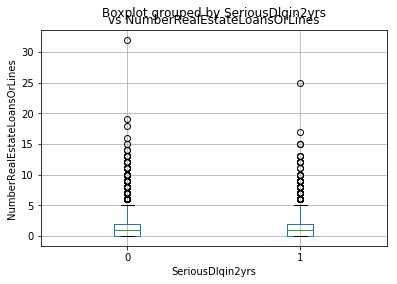

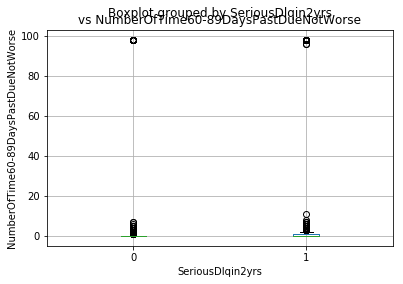

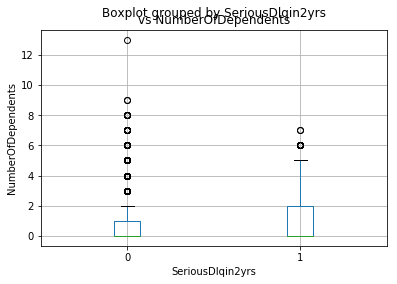

In [9]:
# create dataframe minus people with many outliers then rerun boxplots to see if anything changes
cred_df_less_outliers = cred_df.drop(rows_with_many_outliers)
hw2p1.make_boxplots(cred_df_less_outliers, 'SeriousDlqin2yrs')

In [10]:
# re run scatter plots to see what's up
# commented this out because it takes too much time to run, but it helped me see correlations better
# hw2p1.make_scatter(cred_df_less_outliers)

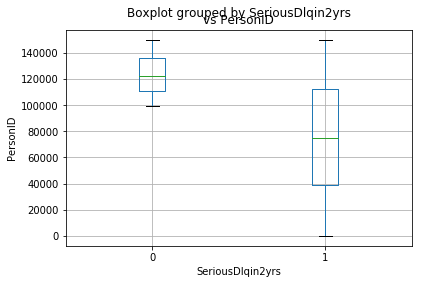

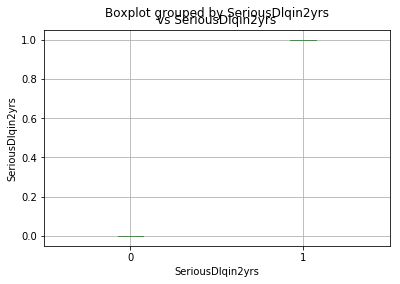

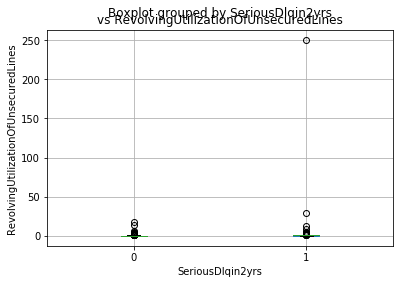

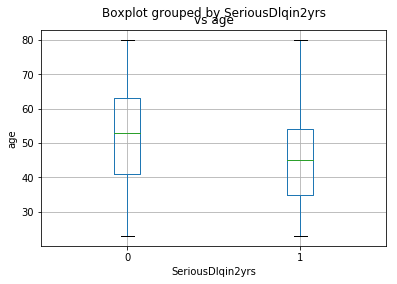

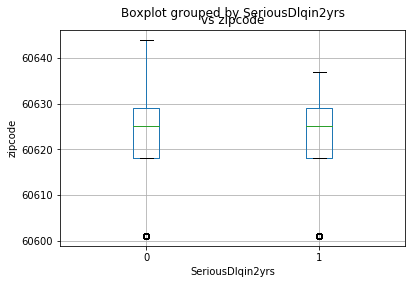

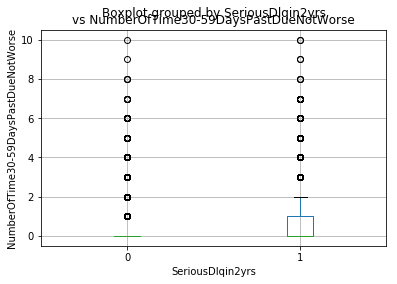

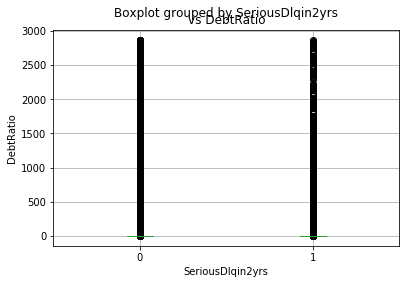

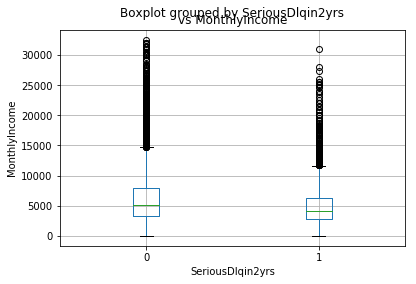

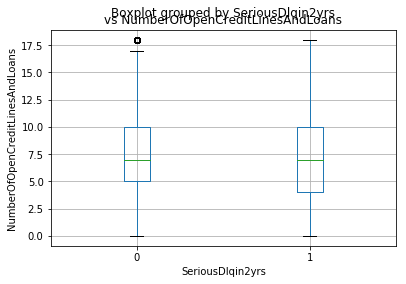

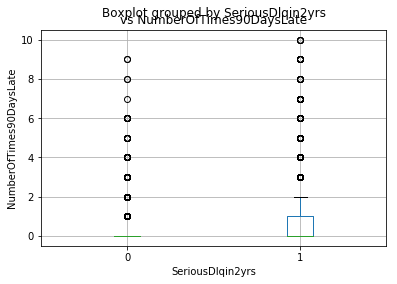

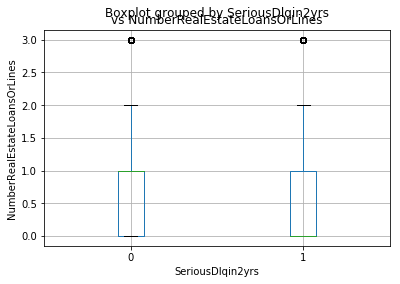

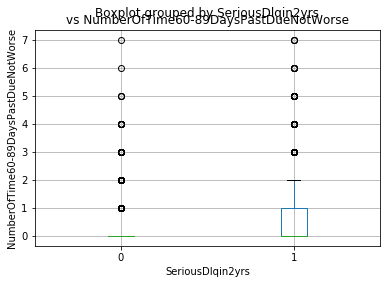

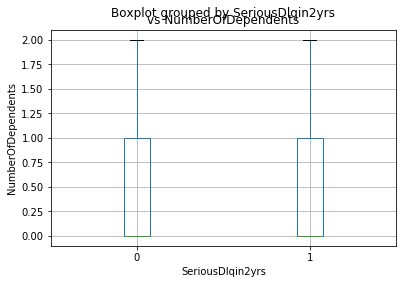

In [11]:
# create dataframe minus people with man outliers then rerun boxplots to see if anything changes
cred_df_no_outliers = cred_df.drop(rows_with_any_outliers)
hw2p1.make_boxplots(cred_df_no_outliers, 'SeriousDlqin2yrs')

In [12]:
# re run scatter to see what's up
# commented this out because it takes too much time to run, but it helped me see correlations better
# make_scatter(cred_df_no_outliers)

In [13]:
# tell me which columns have NAs in them
hw2p1.find_nas(cred_df)

PersonID                                False
SeriousDlqin2yrs                        False
RevolvingUtilizationOfUnsecuredLines    False
age                                     False
zipcode                                 False
NumberOfTime30-59DaysPastDueNotWorse    False
DebtRatio                               False
MonthlyIncome                            True
NumberOfOpenCreditLinesAndLoans         False
NumberOfTimes90DaysLate                 False
NumberRealEstateLoansOrLines            False
NumberOfTime60-89DaysPastDueNotWorse    False
NumberOfDependents                       True
dtype: bool

In [14]:
# options for dataframes: cred_df_no_outliers, cred_df_minus_outliers, cred_df
# options for stat = mean or median

#fill columns with NAs in them with a number (mean, median)

nas_filled = hw2p1.fillnas_with_data(cred_df, 'median', ['MonthlyIncome', 'NumberOfDependents'])
nas_filled.head()

# I chose to use median because it is less likely to be affected by outliers.
# Before creating this function, I check the median and mean of columns with missing data on the full dataset, 
# the dataset with less outliers, and the dataset with no outliers (outliers as defined above). 
# I chose median and the full dataset because the median wasn't as affected by outliers, and in case outliers
# wasn't someone lying, I wanted the algorithm to account for that. Those sound like opposites, but mainly I wanted to 
# choose the stable one between median and mean, while still accounting for all data/not overfitting the data.

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,98976,0,1.000000,55,60601,0,505.000000,0.0,2,0,0,0,0.0
1,98991,0,0.547745,71,60601,0,0.459565,15666.0,7,0,2,0,0.0
2,99012,0,0.044280,51,60601,0,0.014520,4200.0,5,0,0,0,0.0
3,99023,0,0.914249,55,60601,4,0.794875,9052.0,12,0,3,0,0.0
4,99027,0,0.026599,45,60601,0,0.049966,10406.0,4,0,0,0,2.0


In [15]:
# check to make sure nas were filled.
hw2p1.find_nas(cred_df)

PersonID                                False
SeriousDlqin2yrs                        False
RevolvingUtilizationOfUnsecuredLines    False
age                                     False
zipcode                                 False
NumberOfTime30-59DaysPastDueNotWorse    False
DebtRatio                               False
MonthlyIncome                           False
NumberOfOpenCreditLinesAndLoans         False
NumberOfTimes90DaysLate                 False
NumberRealEstateLoansOrLines            False
NumberOfTime60-89DaysPastDueNotWorse    False
NumberOfDependents                      False
dtype: bool

In [16]:
# discretize variable of choice by any buckets with equal-width bins or quantile bins
# options for dataframes: cred_df_no_outliers, cred_df_minus_outliers, cred_df
#options for cut_type: cut, Cut, qcut, Qcut
# if using cut for the cut_type:
    # options for col_names = 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 
        # 'DebtRatio' (use with less or no outliers dataframes because data are too concentrated),
        # 'MonthlyIncome' (use with less or no outliers dataframes because data are too concentrated),
        # 'NumberOfOpenCreditLinesAndLoans' (get more variety with less or no outliers, but fine with all data, too)
        # 'NumberRealEstateLoansOrLines'(use with less or no outliers dataframes because data are too concentrated), 
        # 'NumberOfDependents' (use with less or no outliers dataframes or with higher number of buckets (10+)
            # because data are too concentrated)
# if using qcut for cut_type:
    # options for col_names ='age', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans'

#hw2p1.discretize_variables(cred_df, 'age', 10, 'cut')
#cred_df.head()

# Wanted the user to have the choice of either cut or qcut. I chose cut because I didn't want each bin to have the same 
    # number of entries, and I chose age because I'm curious how the analysis changes by age range.

In [17]:
# create binary/dummy variables from categorical variable
dummy_data = hw2p1.dummify_categories(cred_df, "zipcode") 
dummy_data.head()

,zipcode_60601,zipcode_60618,zipcode_60625,zipcode_60629,zipcode_60637,zipcode_60644
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0


In [18]:
# build classifer: For this assignment, select any classifier you feel comfortable with
X = cred_df.drop(['SeriousDlqin2yrs', 'PersonID'], axis=1)
Y = cred_df['SeriousDlqin2yrs']
test_size = 0.3
n_neighbors = 10
metric = 'minkowski'
metric_params = {'p': 3}
knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric, metric_params=metric_params)

x_train, x_test, y_train, y_test = hw2p1.knn_model(X, Y, test_size, knn)

C:\Users\Alix Gates\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  


In [19]:
# fit the model
fit = hw2p1.knn_fit(x_train, y_train, knn)
print(fit)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params={'p': 3}, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')


In [20]:
# tell me the prediction probability
prediction = hw2p1.predict_classifier(fit, X, knn)
print(prediction)

[[1.  0. ]
 [0.9 0.1]
 [0.8 0.2]
 ...
 [1.  0. ]
 [0.8 0.2]
 [1.  0. ]]


In [21]:
# tell me the accuracy
accuracy = hw2p1.accuracy_classifier(fit, x_test, y_test, knn)
print(accuracy)

0.8327509142624949
